# Implementing A Simple Linear Regression

The first thing that you could do when you are going to work with a problem with data it is to try to plot the data. So let's try to create a little plot.

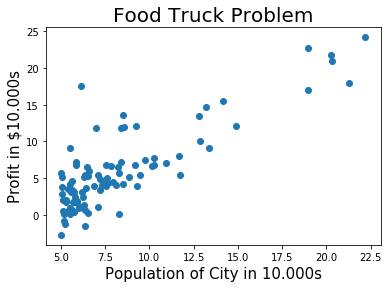

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(suppress=True) # This command is used to avoid the scientific output

## Let's import the data. We have this dataset into data folder
data = np.loadtxt('./data/foodTruck.csv', dtype=np.float64,delimiter=',')
X = data[:,0]; # Population of a city
y = data[:,1]; # Profit in a city
m = data.shape[0]

plt.figure()
plt.title('Food Truck Problem', fontsize=20)
plt.xlabel('Population of City in 10.000s',fontsize=15)
plt.ylabel('Profit in $10.000s',fontsize=15)
plt.scatter(X,y)

In [2]:
XX = np.ones((m,2)) # in order to vectorize our calculation we need to generate our X data to have one more column
XX[:,1] = X # We add our data to this new data vector
theta = np.zeros((2,1)) # Theta Vector. Parameters of our model

iterations = 1500
alpha = 0.01

In [3]:
## Here we define the function to compute the cost to minimize
def computeCost(X,y,theta):
    m = y.shape[0]
    J = 0.0
    h = np.matmul(theta.T,X.T)
    J = 1/(2*m)*np.sum(np.square(np.subtract(h,y)))
    return J

In [4]:
def gradientDescent(X,y,theta,alpha,num_iters):
    m = y.shape[0]
    J_history = np.zeros((num_iters,1))
    for i in range(num_iters):
        h = np.matmul(theta.T,X.T)
        theta[0,0] = theta[0,0] - alpha * 1/m * np.sum(np.subtract(h,y)) 
        theta[1,0] = theta[1,0] - alpha * 1/m * np.sum(np.subtract(h,y)*X[:,1])
        J_history[i,0] = computeCost(X,y,theta)
    return theta,J_history

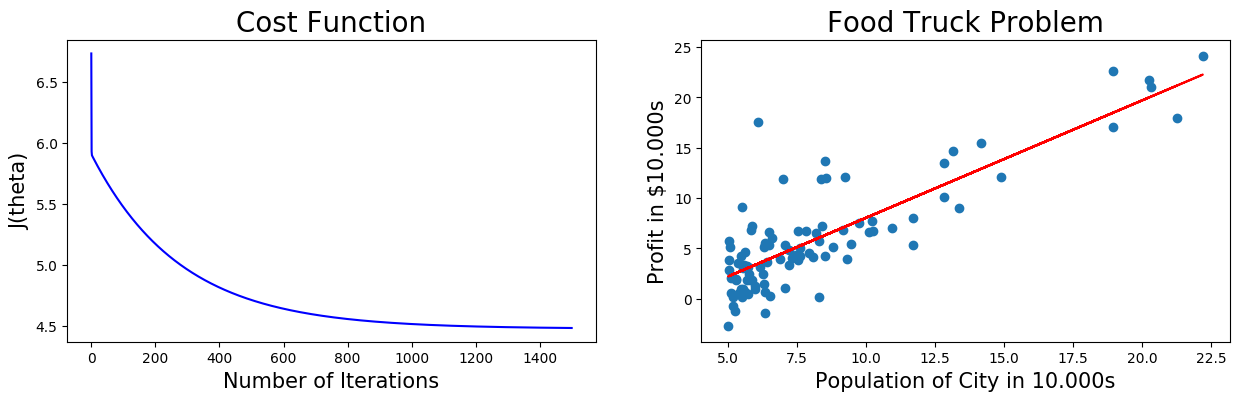

In [5]:
theta,J_history = gradientDescent(XX,y,theta,alpha,iterations)
plt.figure(figsize = (15,4),dpi=100)
plt.subplot(1,2,1)
plt.title('Cost Function', fontsize=20)
plt.xlabel('Number of Iterations',fontsize=15)
plt.ylabel('J(theta)',fontsize=15)
plt.plot(J_history,'b')

yest = np.matmul(theta.T,XX.T)
plt.subplot(1,2,2)
plt.title('Food Truck Problem', fontsize=20)
plt.xlabel('Population of City in 10.000s',fontsize=15)
plt.ylabel('Profit in $10.000s',fontsize=15)
plt.plot(X,yest.T,'r')
plt.scatter(X,y)
